In [137]:
# imports here!

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
from scipy import signal
import math
import cv2
import cmath

PI = np.pi ## denoting common constants..                            
exp = np.e   

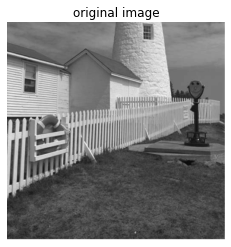

In [129]:
class image :
    
    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()
    
    ##### -------------------- Common code for Both 2 & 3 reading and displaying images ---#
    def __init__ (self, path, display = False):
        self.path = path
        self.I = cv2.imread(self.path, cv2.IMREAD_GRAYSCALE) ## Reading the contents of the image I 
        if(display): ## Displaying I
            self.disp_img(self.I)
            
    #def add gaussian 
    # def add compression
    # def blurring
    
    
img = image('lighthouse.png')
I2 = image('lighthouse.png')


img.disp_img(img.I, title = 'original image')

In [130]:
#########################################3
#######3    Conv operations used in HW3
#########################################

### code for Q1


class Q1:
    ####################### Utitlity functions ####################
    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()
        
    
   
    def __init__ (self, path, display = False, title = None):
        self.path = path
        self.I = cv2.imread(path,cv2.IMREAD_GRAYSCALE) ## Reading images..
        self.N = self.I.shape[0]
        if(display): ## Displaying I
            self.disp_img(self.I, title)
            
    #### Question 1.a --> iterative approach
    ################################################################################################
    def find_DFT_iter(self, I): ## 
        
        self.J = I
        N = self.J.shape[0]
        self.DFT_iter = np.zeros((N,N), dtype = complex)
        
        for u in range(N):
            for v in range(N):
                temp = complex(0,0)
                
                for i in range(N):
                    for j in range(N):
                        phase = -1*(2*PI)*(u*i + v*j)/N
                        temp += self.J[i][j] * (cmath.rect(1, phase))
                
                self.DFT_iter[u][v] =  temp
        return self.DFT_iter
        
        
    def find_IDFT_iter(self,I):

        self.J = I
        N = self.J.shape[0]
        self.IDFT_iter = np.zeros((N,N), dtype = complex)
        
        for i in range(N):
            for j in range(N):
                temp = complex(0,0)
                
                for u in range(N):
                    for v in range(N):
                        phase = (2*PI)*(u*i + v*j)/N
                        temp += self.J[u][v] * (cmath.rect(1, phase)) * (1/(N)**2 )
                
                self.IDFT_iter[i][j] = temp
        
        self.IDFT_iter = np.round(abs(self.IDFT_iter))
        self.IDFT_iter = np.array(self.IDFT_iter, dtype = np.uint8)
        
        return self.IDFT_iter
    ################################################################################################
    
    
        
    #### Question 1.b --> Matrix approach 
    ##########################################################################################
    def find_DFT(self, I): ### funct to compute DFT using matrix approach
        
        self.J = I.copy()
        N = self.J.shape[0]
        self.DFT = np.zeros((N,N), dtype = complex)
        
        phase =  -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix

        self.DFT = W@self.J@W
        return self.DFT
    
    
    def find_IDFT(self, I): ### finding IDFT using matrix approach
        self.J = I
        N = self.J.shape[0]
        self.IDFT = np.zeros((N,N), dtype = complex)
        
        phase =  -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix

        W_inv = (1/N) * np.conjugate(W)
        
        self.IDFT = W_inv@self.J@W_inv
        self.IDFT = np.round(abs(self.IDFT))
        self.IDFT = np.array(self.IDFT, dtype = np.uint8)
        
        return self.IDFT
    ##########################################################################################
    
    
        
    ################################################################################   
    #### Operations ... DFT visualisations and reconstructions ...
    ################################################################################
    
    ### basic magnitude
    def magnitude(self, DFT, display = False, title = None):
        self.DFT_mag = np.abs(DFT)
        
        if(display):
            self.disp_img(self.DFT_mag, title)
        return self.DFT_mag
    
    ### utilities 
    ###  magnitude with log compression
    def log_compressed_magnitude(self, DFT, display = False, title = None):
        
        ## utility function...
        def log_compressed_FSCS(I):
            I = np.log2(1+I)
            mini,maxi = np.amin(I), np.amax(I)
            J = np.array( [[ (( (I[i][j] - mini)/ (maxi - mini) ) *255) for j in range(I.shape[1]) ] for i in range(I.shape[0])]  ,dtype = np.uint8)
            return J
        
        self.DFT_mag = np.abs(DFT)
        self.DFT_mag_log_compressed = log_compressed_FSCS(self.DFT_mag)
        
        if(display):
            self.disp_img(self.DFT_mag_log_compressed, title)
        return self.DFT_mag_log_compressed
    
    
    ### displaying phase of the DFT : also performing FSCS to map [-pi , pi]--> [0,255]
    def phase(self, DFT, display = False, title = None): ### applying FSCS to phase [-pi , pi]--> [0,255]
        I = np.angle(DFT,deg=False)  ### raw phase in radians
        mini,maxi = np.amin(I), np.amax(I)
        self.phase = np.array( [[ (( (I[i][j] - mini)/ (maxi - mini) ) *255) for j in range(I.shape[1]) ] for i in range(I.shape[0])]  ,dtype = np.uint8)

        if(display):
            self.disp_img(self.phase, title)
        return self.phase, I ## returns FSCS phase --> lies in [0,255] and raw phas--> [-pi, pi]
    
    ################################################################################
    
    # For 1.2
    ## transforming I to get centered DFT
    def center_I_transform(self, I): ### Transfrorming I to get a centered DFT
        self.I_cap = np.array([[  ((-1)**(i+j)) * I[i][j]  for j in range(I.shape[1])] for i in range(I.shape[0])])
        return self.I_cap
    
    # For 1.4
    #### Constructing DFT from mag and phase ## utility for q1.d
    def dft_from_mag_and_phase(self,mag, phase):
        N = mag.shape[0]
        DFT = np.array( [[ cmath.rect(mag[i][j],phase[i][j]) for j in range(N)] for i in range(N)] ,dtype = complex)
        return DFT
        



### Code for Q2
class Q2(Q1): ### inheriting all the methods from Q1
    ####################### Utitlity functions ####################
    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()
        
    
   
    def __init__ (self, path, display = False, title = None):
        self.path = path
        self.I = cv2.imread(path,cv2.IMREAD_GRAYSCALE) ## Reading images..
        self.N = self.I.shape[0]
        if(display): ## Displaying I
            self.disp_img(self.I, title)
            
            
    ############################ Code 2.1 ##########################3
    ###  An iterative approach for circular conv
    def circular_conv(self,I,F):
        J = np.zeros((I.shape))
        M,N = J.shape
        
        for i in range(M):
            for j in range(N):
                temp = 0
                for p in range(F.shape[0]):
                    for q in range(F.shape[1]):
                        temp+= I[(i-p)%M][ (j-q)%N ] * F[p][q]
                J[i][j] = np.round(temp)
        return J
    ############################ Code 2.2 ##########################33#
    ### Padding and performing linear conv
    def zero_padding(self, I, target_shape):
        J = np.zeros(target_shape)
        ### padding zeros at the bottom right 
        J[0:I.shape[0],0:I.shape[1]] = I[0:I.shape[0],0:I.shape[1]]
        return J
    
    def linear_conv_using_circular_conv(self,I, F):
        I_padded = self.zero_padding(I, (I.shape[0] + F.shape[0] -1, I.shape[1] + F.shape[1] -1))
        ### Target shape... m+n-1 for linear conv
        J = self.circular_conv(I_padded, F) ## Using the circular conv operation
        J_crop = J[0:I.shape[0]][0:I.shape[1]]
        return J, J_crop
        
        
    ########################  Code 2.3 ###############################
    ### Padded and computing IDFT( DFT(I). DFT(F))
    def linear_conv_with_DFT(self, I, F):
        N,M = I.shape
        P,P  = F.shape
        
        #### Padding both images..
        I = self.zero_padding(I,(N+P-1,M+P-1))
        F = self.zero_padding(F,(N+P-1,M+P-1))
        
        I_DFT = self.find_DFT(I)
        F_DFT = self.find_DFT(F)
        
        J = np.multiply(I_DFT, F_DFT, dtype= complex)
        
        J_IDFT = self.find_IDFT(J)
        J_cropped = J_IDFT[0:I.shape[0]][0:I.shape[1]]
        
        return J_IDFT, J_cropped
        
        



In [236]:
class conv_oper:
    def __init__(self):
        pass

    
    def zero_padding(self, I, target_shape):
        J = np.zeros(target_shape)
        ### padding zeros at the bottom right 
        J[0:I.shape[0],0:I.shape[1]] = I[0:I.shape[0],0:I.shape[1]]
        return J
    #### Question 1.b --> Matrix approach 
    ##########################################################################################
    def find_DFT(self, I): ### funct to compute DFT using matrix approach
        
        self.J = I.copy()
        N = self.J.shape[0]
        self.DFT = np.zeros((N,N), dtype = complex)
        
        phase =  -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix

        self.DFT = W@self.J@W
        return self.DFT
    
    
    def find_IDFT(self, I): ### finding IDFT using matrix approach
        self.J = I
        N = self.J.shape[0]
        self.IDFT = np.zeros((N,N), dtype = complex)
        
        phase =  -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix

        W_inv = (1/N) * np.conjugate(W)
        
        self.IDFT = W_inv@self.J@W_inv
        self.IDFT = np.round(abs(self.IDFT))
        self.IDFT = np.array(self.IDFT)
        
        return self.IDFT
    
    ### Padded and computing IDFT( DFT(I). DFT(F))
    def linear_conv_with_DFT(self, I, F):
        N,M = I.shape
        print('N,M',N,M)
        P,P  = F.shape
        
        #### Padding both images..
        I = self.zero_padding(I,(N+P-1,M+P-1))
        F = self.zero_padding(F,(N+P-1,M+P-1))
        
        I_DFT = self.find_DFT(I)
        F_DFT = self.find_DFT(F)
        
        J = np.multiply(I_DFT, F_DFT, dtype= complex)
        
        J_IDFT = self.find_IDFT(J)
        J_cropped = J_IDFT[0:N,0:N]
        
        return J_IDFT, J_cropped

In [233]:
class quality_mertics(image):
    def __init__(self):
        pass
    
    def gaussian_kernel(self,F, sig = 1):
        # returns a gaussian kern for convolution of size (F,F)
        x = np.linspace(-(F-1)/2., (F-1)/2., F)
        gauss_1d = np.exp(-0.5*np.square(x) / (np.square(sig))) # 1D kernel
        kernel = np.outer(gauss_1d, gauss_1d)  # using seperability
        kernel = kernel/np.sum(kernel)
        return kernel
    
    def circular_conv(self,I,F):
        J = np.zeros((I.shape))
        M,N = J.shape
        
        for i in range(M):
            for j in range(N):
                temp = 0
                for p in range(F.shape[0]):
                    for q in range(F.shape[1]):
                        temp+= I[(i-p)%M][ (j-q)%N ] * F[p][q]
                J[i][j] = np.round(temp)
        return J
    
    def SSIM(self,I,J, display = True):
        
        I = I.astype(np.float64) ## since the one entering is a np.unit8 matrix
        J = J.astype(np.float64)

        ### Constants
        self.W = self.gaussian_kernel(F = 11) ## A gaussian filter of size 11
        self.C1,self.C2 = (0.02*255)**2, (0.03*255)**2
        self.C3 = self.C2/2.
        
        
        #mu_I = self.circular_conv(I,self.W)
        #mu_J = self.circular_conv(J,self.W)
        
        mu_I = signal.fftconvolve(self.W, I, mode='valid')
        mu_J = signal.fftconvolve(self.W, J, mode='valid')
        
        #print(mu_I)
        I_sq, mu_I_sq = (I**2) , (mu_I)**2
        J_sq, mu_J_sq = (J**2) , (mu_J)**2

        #sig_I_sq = self.circular_conv(I_sq, self.W) - mu_I_sq
        #sig_J_sq = self.circular_conv(J_sq, self.W) - mu_J_sq
        
        sig_I_sq = (signal.fftconvolve(self.W, I_sq, mode='valid') - mu_I_sq)
        print
        sig_J_sq = (signal.fftconvolve(self.W, J_sq, mode='valid') - mu_J_sq)

        sig_I = sig_I_sq**0.5
        sig_J = sig_J_sq**0.5

        
        #sig_IJ = self.circular_conv(I*J, self.W) - (mu_I)*(mu_J)
        sig_IJ = signal.fftconvolve(self.W, I*J, mode='valid') - (mu_I)*(mu_J)
        
        
        self.L = ((2*mu_I*mu_J) + self.C1 )/(mu_I_sq + mu_J_sq + self.C1)

        
        self.C = ((2*sig_I*sig_J) + self.C2)/(sig_I_sq + sig_J_sq + self.C2)
        
        self.S = (sig_IJ + self.C3)/((sig_I*sig_J) + self.C3)
        
        self.SSIM = self.L * self.C * self.S
        self.mean_SSIM = np.mean(self.SSIM)
        
        if(display):
            self.disp_img(self.SSIM, title = 'SSIM = {}'.format(self.mean_SSIM))
        
        
        

In [234]:
class quality_mertics(image):
    def __init__(self):
        pass
    
    def gaussian_kernel(self,F, sig = 1):
        # returns a gaussian kern for convolution of size (F,F)
        x = np.linspace(-(F-1)/2., (F-1)/2., F)
        gauss_1d = np.exp(-0.5*np.square(x) / (np.square(sig))) # 1D kernel
        kernel = np.outer(gauss_1d, gauss_1d)  # using seperability
        kernel = kernel/np.sum(kernel)
        return kernel
    
    def circular_conv(self,I,F):
        J = np.zeros((I.shape))
        M,N = J.shape
        
        for i in range(M):
            for j in range(N):
                temp = 0
                for p in range(F.shape[0]):
                    for q in range(F.shape[1]):
                        temp+= I[(i-p)%M][ (j-q)%N ] * F[p][q]
                J[i][j] = np.round(temp)
        return J
    
    def SSIM(self,I,J, display = True):
        
        I = I.astype(np.float64) ## since the one entering is a np.unit8 matrix
        J = J.astype(np.float64)

        ### Constants
        self.W = self.gaussian_kernel(F = 11) ## A gaussian filter of size 11
        self.C1,self.C2 = (0.02*255)**2, (0.03*255)**2
        self.C3 = self.C2/2.
        
        #mu_I = self.circular_conv(I,self.W)
        #mu_J = self.circular_conv(J,self.W)
        
        #_,mu_I = conv_oper().linear_conv_with_DFT(I,self.W)
        #_,mu_J = conv_oper().linear_conv_with_DFT(J,self.W)
        
        mu_I = signal.fftconvolve(self.W, I, mode='same')
        mu_J = signal.fftconvolve(self.W, J, mode='same')
        

        I_sq, mu_I_sq = (I**2) , (mu_I)**2
        J_sq, mu_J_sq = (J**2) , (mu_J)**2
        
        #sig_I_sq = self.circular_conv(I_sq, self.W) - mu_I_sq
        #sig_J_sq = self.circular_conv(J_sq, self.W) - mu_J_sq
        
        sig_I_sq = np.abs(signal.fftconvolve(self.W, I_sq, mode='same') - mu_I_sq)
        sig_J_sq = np.abs(signal.fftconvolve(self.W, J_sq, mode='same') - mu_J_sq)
        

        #sig_I_sq = np.abs(conv_oper().linear_conv_with_DFT(I_sq,self.W)[1] - mu_I_sq)
        #sig_J_sq = np.abs(conv_oper().linear_conv_with_DFT(J_sq,self.W)[1] - mu_J_sq)
        


        sig_I = sig_I_sq**0.5
        sig_J = sig_J_sq**0.5

        #sig_IJ = self.circular_conv(I*J, self.W) - (mu_I)*(mu_J)
        #sig_IJ = conv_oper().linear_conv_with_DFT(I*J,self.W)[1] - (mu_I)*(mu_J)
        sig_IJ = signal.fftconvolve(self.W, I*J, mode='same') - (mu_I)*(mu_J)
        
        
        self.L = ((2*mu_I*mu_J) + self.C1 )/(mu_I_sq + mu_J_sq + self.C1)
        
        self.C = ((2*sig_I*sig_J) + self.C2)/(sig_I_sq + sig_J_sq + self.C2)
        
        self.S = (sig_IJ + self.C3)/((sig_I*sig_J) + self.C3)
        
        self.SSIM = (self.L * self.C * self.S)
        self.SSIM_img = (self.SSIM*255).astype(np.uint8)
        self.mean_SSIM = np.mean(self.SSIM)
        
        if(display):
            self.disp_img(self.SSIM_img, title = 'SSIM = {}'.format(self.mean_SSIM))
        
        
        

(691, 691)


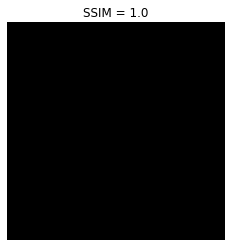

In [222]:
P2 = quality_mertics()

print(img.I.shape)
P2.SSIM(I= img.I,J = img.I)


### Same image

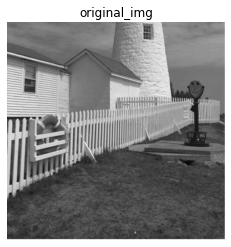

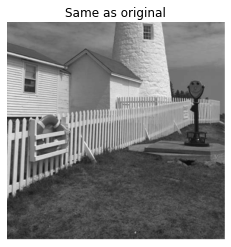

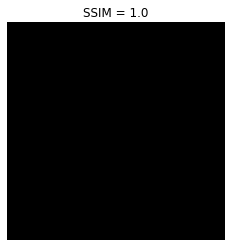

In [223]:
I = img.I
J = I

P2 = quality_mertics()
P2.disp_img(I,'original_img')
P2.disp_img(J,'Same as original')
P2.SSIM(I= I,J = J)


### Adding AWGN to the image

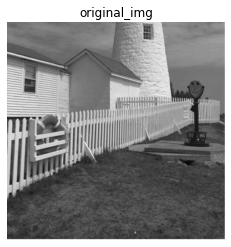

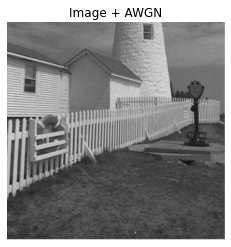

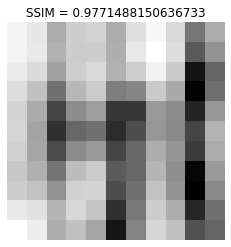

In [216]:
def noise(I, mean, var):
    sig = var**0.5
    return np.random.normal(mean,sig,I.shape)

I = img.I

AWGN_noise = noise(I,0,50)
J = I+AWGN_noise



P2 = quality_mertics()
P2.disp_img(I,'original_img')
P2.disp_img(J,'Image + AWGN')
P2.SSIM(I= I,J = J)


### gaussian blurred image

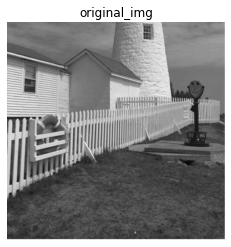

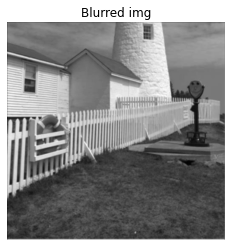

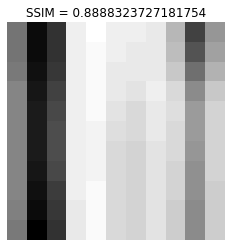

In [240]:
I = img.I
F = quality_mertics().gaussian_kernel(F = 11)
J = signal.fftconvolve(I, F, mode='same')

P2 = quality_mertics()
P2.disp_img(I,'original_img')
P2.disp_img(J,'Blurred img')
P2.SSIM(I= I,J = J)

### Jpeg compressed image

In [252]:
### for jpeg compression

from io import StringIO
from PIL import Image
im_png = Image.open('lighthouse.png')
im_png = im_png.convert('RGB')
buffer = StringIO()
im_png.save('jpeg_quality_90.jpg', "JPEG", quality=90)
im_png.save('jpeg_quality_10.jpg', "JPEG", quality=10)
im_png.save('jpeg_quality_1.jpg', "JPEG", quality=1)

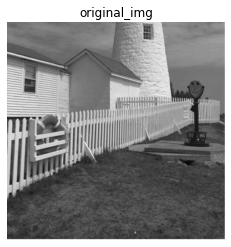

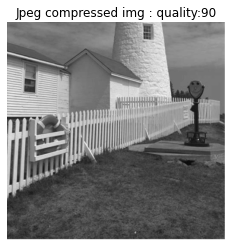

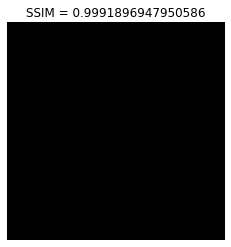

In [253]:
img1 = image('lighthouse.png')
img2 = image('jpeg_quality_90.jpg')

I = img1.I
J = img2.I


P2 = quality_mertics()
P2.disp_img(I,'original_img')
P2.disp_img(J,'Jpeg compressed img : quality:90')
P2.SSIM(I= I,J = J)

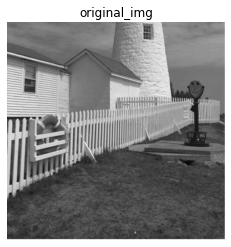

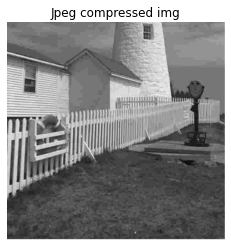

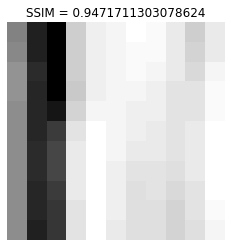

In [248]:
img1 = image('lighthouse.png')
img2 = image('jpeg_quality_10.jpg')

I = img1.I
J = img2.I


P2 = quality_mertics()
P2.disp_img(I,'original_img')
P2.disp_img(J,'Jpeg compressed img : quality:10')
P2.SSIM(I= I,J = J)

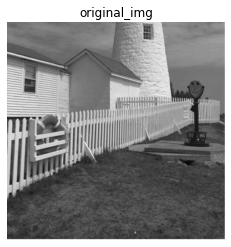

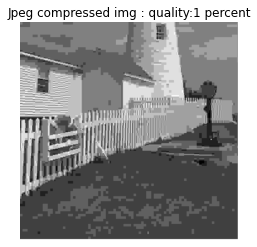

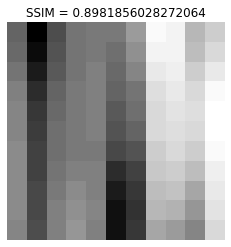

In [251]:
img1 = image('lighthouse.png')
img2 = image('jpeg_quality_1.jpg')

I = img1.I
J = img2.I


P2 = quality_mertics()
P2.disp_img(I,'original_img')
P2.disp_img(J,'Jpeg compressed img : quality:1 percent')
P2.SSIM(I= I,J = J)